In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('./input/movies-tmdb-10000.csv')

In [24]:
df_train.columns

Index(['Unnamed: 0', 'title', 'release_date', 'vote_average', 'vote_count',
       'original_language', 'popularity'],
      dtype='object')

In [26]:
df_train.head()

,Unnamed: 0,title,release_date,vote_average,vote_count,original_language,popularity
0,0,The Godfather,1972-03-14,8.7,17537,en,103.429
1,1,The Shawshank Redemption,1994-09-23,8.7,23369,en,119.717
2,2,Cuando Sea Joven,2022-09-14,8.7,208,es,44.971
3,3,"The Boy, the Mole, the Fox and the Horse",2022-12-25,8.6,241,en,40.793
4,4,The Godfather Part II,1974-12-20,8.6,10619,en,61.662


In [14]:
df_train['original_language'].describe()

count     10000
unique       44
top          en
freq       7668
Name: original_language, dtype: object

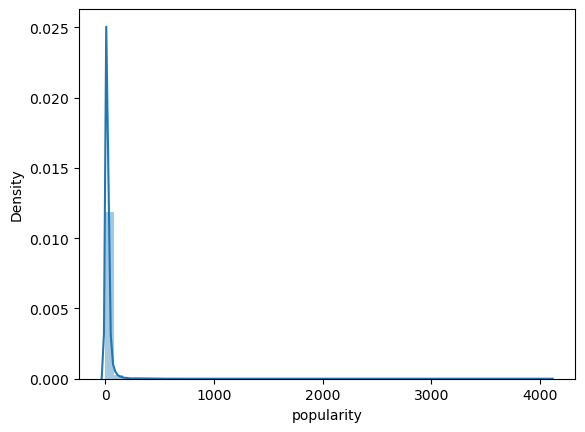

In [6]:
sns.distplot(df_train['popularity']);

In [7]:
print("Skewness: %f" % df_train['popularity'].skew())
print("Kurtosis: %f" % df_train['popularity'].kurt())

Skewness: 33.426350
Kurtosis: 1519.077602


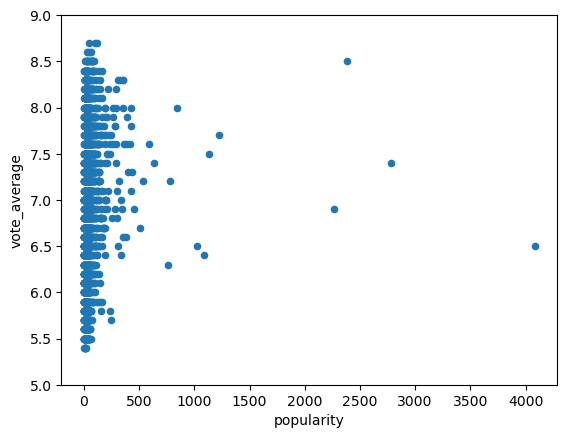

In [8]:
var = 'popularity'
data = pd.concat([df_train['vote_average'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='vote_average', ylim=(5,9));


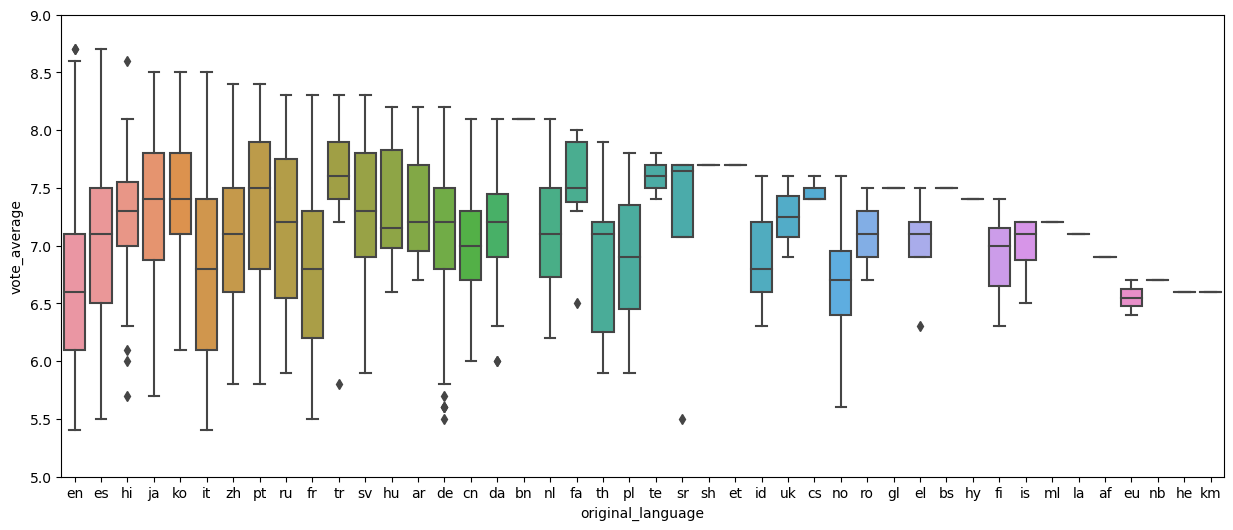

In [9]:
var = 'original_language'
data = pd.concat([df_train['vote_average'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="vote_average", data=data)
fig.axis(ymin=5, ymax=9);

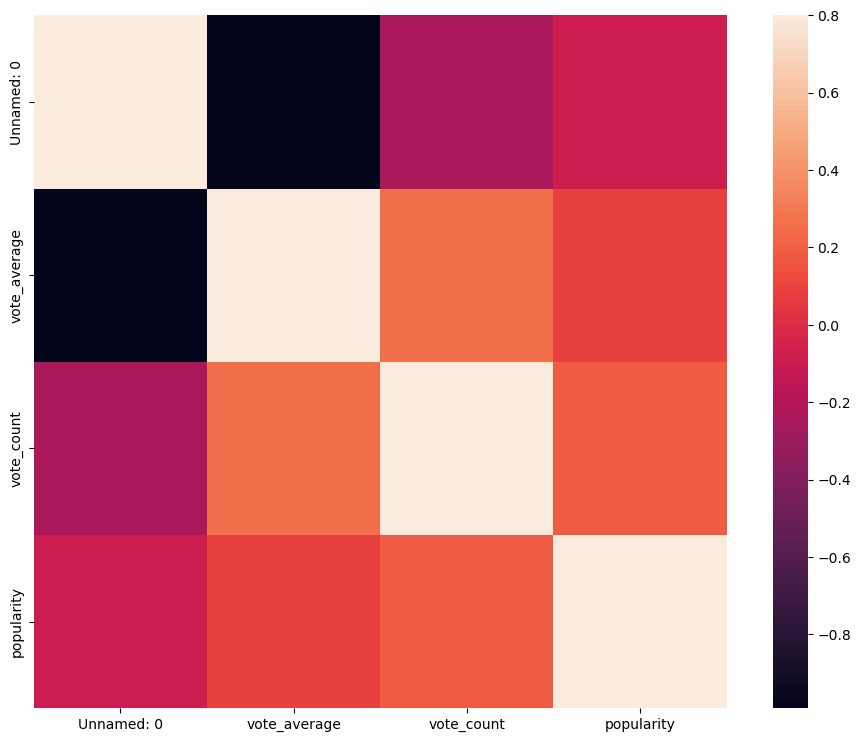

In [10]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

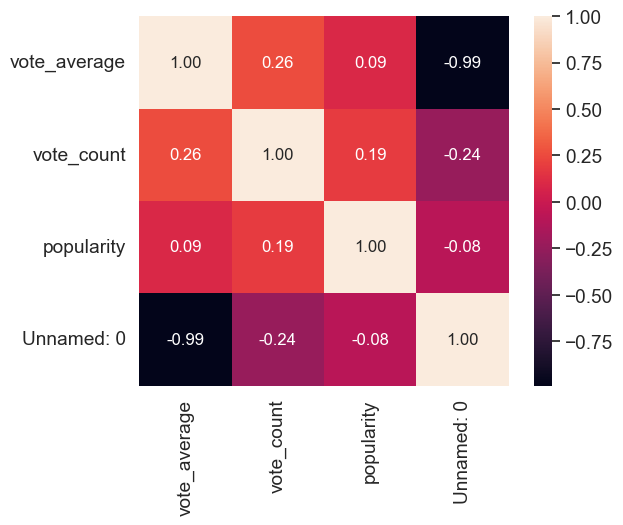

In [19]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'vote_average')['vote_average'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
overview,2,0.0002
Unnamed: 0,0,0.0000
title,0,0.0000
release_date,0,0.0000
vote_average,0,0.0000
vote_count,0,0.0000
original_language,0,0.0000
popularity,0,0.0000
